In [1]:
import numpy as np               # conventient handling of numbers, lists, arrays
import matplotlib.pyplot as plt  # plotting functions
import maunakini as mk           # NMR data handling objects. Mauna Kini means 'many mountains' in Hawaiian. 
import nmrplotlib as npl         # custom NMR data plotting functions

In [2]:
NOESY = mk.LINData3D('3D_NNOESY_long_linear')  # load data from directory '3D_NNOESY_long_linear'

Data Points structure is: [2048, 68, 1200]
DECIM= 16 DSPFVS= 12 GRPDLY= 71.625
Echo-AntiEcho Detected in T2 - dealing with it...
Converted Data Points structure is: [951, 68, 1200]


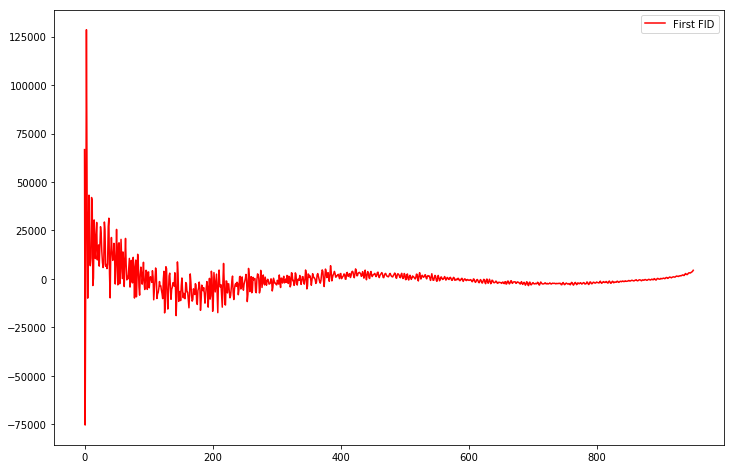

In [73]:
plt.figure(figsize=(12, 8))            # initialize the plot figure and size it
plt.plot(                              # plotting function
    np.real(                           # we only want the real components
        NOESY.converted_data[:, 0, 0]  # we only want the first FID
    ),                                 # close off real number selection
    c='r',                             # lets colour the plot red
    label='First FID'                  # and label it for the plot legend
)                                      # close off the plotting function
plt.legend()                           # put the plot legend up
plt.show()                             # display it

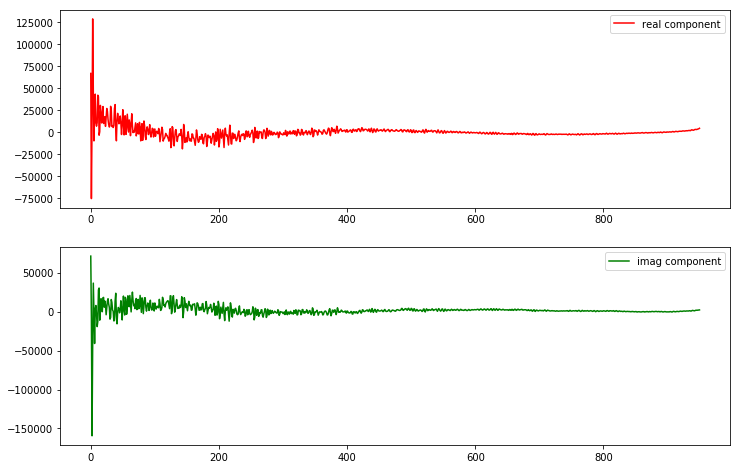

In [69]:
fid = NOESY.converted_data[:, 0, 0]
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(np.real(fid), c='r', label='real component')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(np.imag(fid), c='g', label='imag component')
plt.legend()
plt.show()

(27120.522886324074-2066.963070686867j)
(-479.8345402049975+227.36371385472899j)
(2.446063809962243-1.734235965323661j)
(-0.005194579921849413+0.004736113905126831j)
(4.873422165381026e-06-5.403733783949112e-06j)
(-1.6705060491783047e-09+2.192178725733161e-09j)


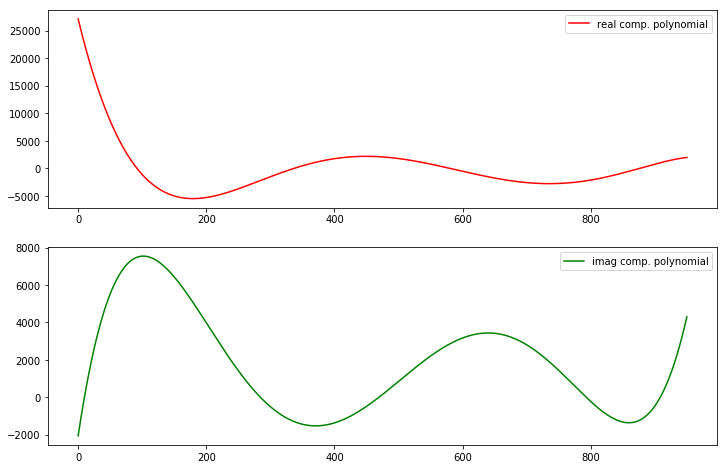

In [74]:
coefp = np.polynomial.polynomial.polyfit(    # coefp will equal list of determined coefficients
    np.arange(len(fid)),                     # X axis is list from 0 to number of points in FID
    fid,                                     # Y axis is the values of the FID
    5                                        # polynomial order = 5, which gives 6 coefficients
)
polyline = 0                                 # We'll construct the polynomial line. Lets start with zero
time_points = np.arange(len(fid))            # again, X axis is list from 0 to number of points in FID
for i in range(len(coefp)):                  # lets loop over all the detemrined coefficients
    print(coefp[i])                          # print each one
    polyline += coefp[i] * time_points ** i  # add the i'th order polynomial to polyline

plt.figure(figsize=(12, 8))                  # Everything below just plots the polyline for us
plt.subplot(2, 1, 1)                         # first the real part and then the imaginary part
plt.plot(np.real(polyline),
         c='r',
         label='real comp. polynomial'
        )
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(np.imag(polyline),
         c='g',
         label='imag comp. polynomial'
        )
plt.legend()
plt.show()

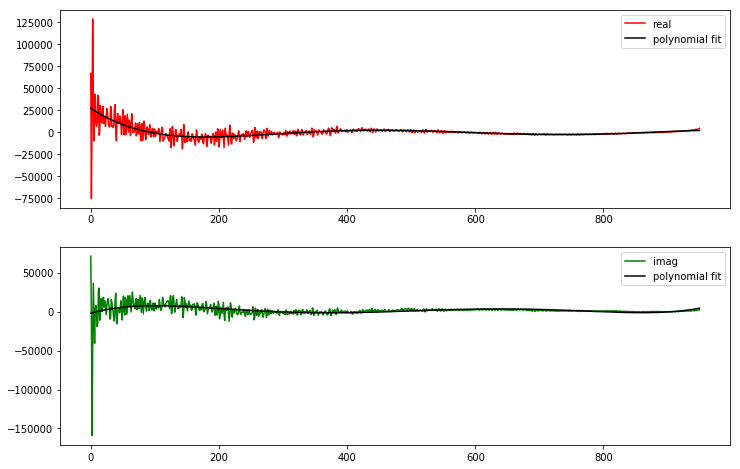

In [66]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(np.real(fid), c='r', label='real')
plt.plot(np.real(polyline), c='k', label='polynomial fit')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(np.imag(fid), c='g', label='imag')
plt.plot(np.imag(polyline), c='k', label='polynomial fit')
plt.legend()
plt.show()

In [39]:
fid_adjusted = fid - polyline

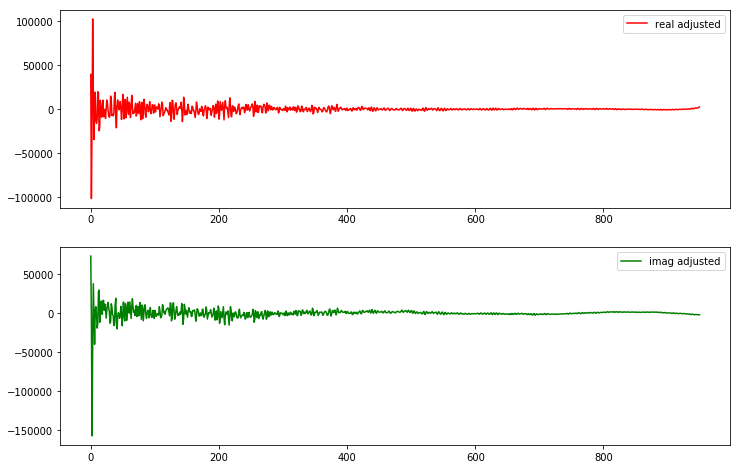

In [78]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(np.real(fid_adjusted), c='r', label='real adjusted')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(np.imag(fid_adjusted), c='g', label='imag adjusted')
plt.legend()
plt.show()

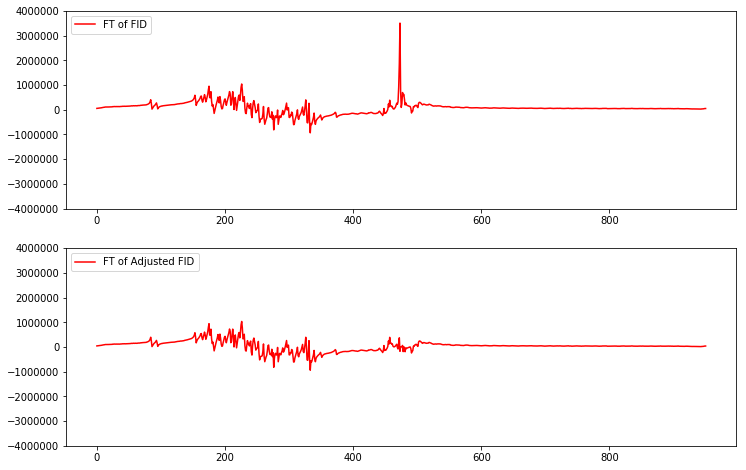

In [61]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(np.real(np.fft.fftshift(np.fft.fft(fid))[::-1]), c='r', label='FT of FID')
plt.ylim(-4000000, 4000000)
plt.legend(loc=2)
plt.subplot(2, 1, 2)
plt.plot(np.real(np.fft.fftshift(np.fft.fft(fid_adjusted))[::-1]), c='r', label='FT of Adjusted FID')
plt.ylim(-4000000, 4000000)
plt.legend(loc=2)
plt.show()

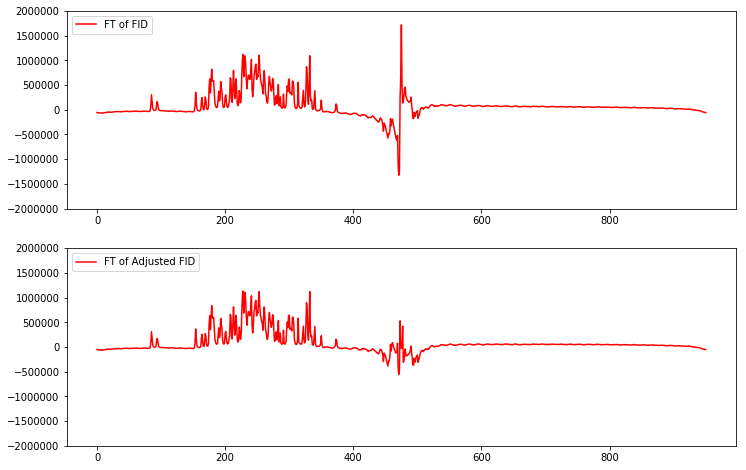

In [62]:
phase = np.exp(1.j * (-90 / 180) * np.pi)         # this will adjust the phase by -90º  
plt.figure(figsize=(12, 8))                       # prepare figure
plt.subplot(2, 1, 1)                              # subplot
plt.plot(np.real(                                 # plot the real part
    np.fft.fftshift(                              # with the result shifted so zero frequency is in the middle
        np.fft.fft(                               # the fft
            fid*phase))[::-1]),                   # of the FID after phase correction
                                                  # we also reverse the order of the data with the [::-1] 
                                                  # at the end because this is NMR and we plot backwards ;)
         c='r',                                   # plot it in red
         label='FT of FID'                        # label it 'FT of FID'
        )
plt.ylim(-2000000, 2000000)                       # set limits on the Y axis (to compare visually below)
plt.legend(loc=2)
plt.subplot(2, 1, 2)                              # new subplot
plt.plot(np.real(                                 # the real part of
    np.fft.fftshift(                              # and shifted so zero frequency is in the middle
        np.fft.fft(fid_adjusted*phase))[::-1]),   # the fft of the adjust FID
         c='r',                                   # red is beautiful. red is harmony
         label='FT of Adjusted FID'               # label it the adjusted FID
        )
plt.ylim(-2000000, 2000000)                       # plot it with same Y axis as above
plt.legend(loc=2)
plt.show()

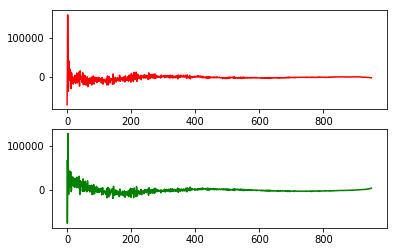

In [27]:
phase = np.exp(1.j * (+90 / 180) * np.pi)
fid = NOESY.converted_data[:, 0, 0] * phase
plt.subplot(2, 1, 1)
plt.plot(np.real(fid), c='r')
plt.subplot(2, 1, 2)
plt.plot(np.imag(fid), c='g')
plt.show()

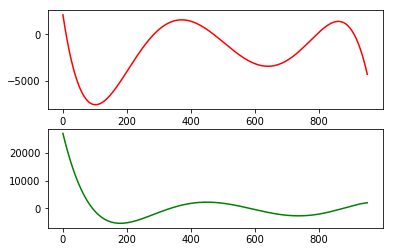

In [28]:
coefp = np.polynomial.polynomial.polyfit(np.arange(len(fid)), fid, 5)
polyline = 0
time_points = np.arange(len(fid))
for i in range(len(coefp)):
    # print(coefp[i])
    polyline += coefp[i] * time_points ** i
    
plt.subplot(2, 1, 1)
plt.plot(np.real(polyline), c='r')
plt.subplot(2, 1, 2)
plt.plot(np.imag(polyline), c='g')
plt.show()

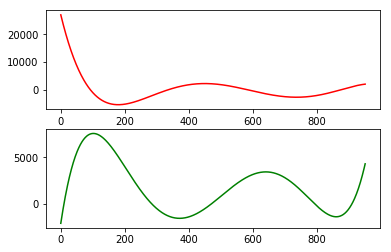

In [75]:
fid = NOESY.converted_data[:, 0, 0]
coefp = np.polynomial.polynomial.polyfit(np.arange(len(fid)), fid, 5)
polyline = 0
time_points = np.arange(len(fid))
for i in range(len(coefp)):
    # print(coefp[i])
    polyline += coefp[i] * time_points ** i
    
plt.subplot(2, 1, 1)
plt.plot(np.real(polyline), c='r')
plt.subplot(2, 1, 2)
plt.plot(np.imag(polyline), c='g')
plt.show()



27120.522886325463 -2066.9630706855296
-479.8345402050458 227.3637138546939
2.4460638099625993 -1.7342359653234227
-0.005194579921850415 0.004736113905126208
4.873422165382208e-06 -5.4037337839484066e-06
-1.670506049178798e-09 2.1921787257328723e-09


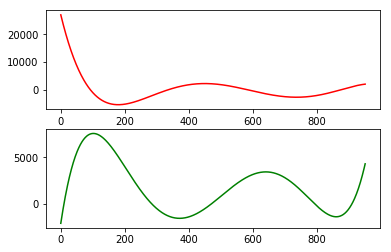

In [77]:
fid = NOESY.converted_data[:, 0, 0]
coefp_r = np.polynomial.polynomial.polyfit(np.arange(len(fid)), np.real(fid), 5)
coefp_i = np.polynomial.polynomial.polyfit(np.arange(len(fid)), np.imag(fid), 5)
polyline_r = 0
polyline_i = 0
time_points = np.arange(len(fid))
for i in range(len(coefp)):
    print(coefp_r[i], coefp_i[i])
    polyline_r += coefp_r[i] * time_points ** i
    polyline_i += coefp_i[i] * time_points ** i
    
plt.subplot(2, 1, 1)
plt.plot(np.real(polyline_r), c='r')
plt.subplot(2, 1, 2)
plt.plot(np.real(polyline_i), c='g')
plt.show()



In [226]:
import numpy as np                       # import a library called numpy - we reference it as 'np'
byte_order = 1                           # this means integers are encoded as little endian in our example. 
file = '3D_NNOESY_long_linear/ser'       # location of the Bruker serial file, 'ser'
with open(file, 'rb') as serial_file:    # method of opening the file. We now reference it as 'serial_file'
    if byte_order == 0:                  # byte order refers to big or little endian - a way 32 bit integers
                                         # are encoded. Don't worry. In this example, byte_order is 1.
                                         # we'll show you later how this is detected.
        raw_data = np.frombuffer(        # we read the file data into an 'np' vector called 'raw_data'
            serial_file.read(),          # this is the command to read it
            dtype='<i4'                  # this says 'read it as type big endian'
        )                                # close off the reading function
    elif byte_order == 1:                # or if the byte order is 1 - which it is for this example
                                         # lets read it as little endian
        raw_data = np.frombuffer(        # read into raw data
            serial_file.read(),          # the serial file
            dtype='>i4'                  # with little endian encoding
        )                                # and close off the reading function


In [227]:
data_length = len(raw_data)
num_points_per_fid = 2048
print(data_length/num_points_per_fid)

81600.0


In [228]:
num_fids

81600.0

In [229]:
fid = raw_data[0:2048]
reals = fid[0::2]
imags = fid[1::2]

fid = reals + 1.j*imags

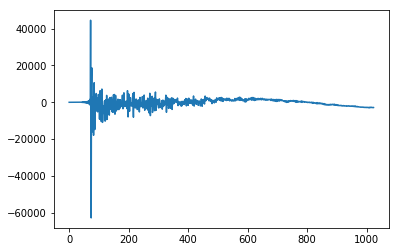

In [230]:
plt.plot(np.real(fid)); plt.show()


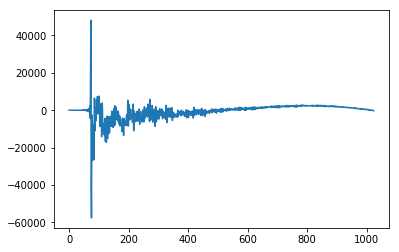

In [231]:
plt.plot(imags); plt.show()

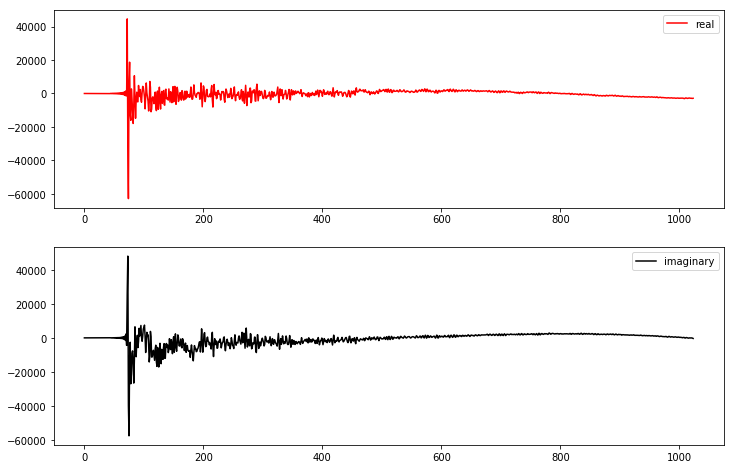

In [232]:
import matplotlib.pyplot as plt              # import plotting library as plt
plt.figure(figsize=(12,8))                   # make a figure. Size it 12 x 8. 
plt.subplot(2, 1, 1)                         # create subplot (2x1) and this is the first (1)
plt.plot(np.real(fid),                       # plot the real part of fid. 
         c='r',                              # Colour it red ('r')
         label='real'                        # Label is 'real'
        )  
plt.legend()                                 # plot the legend (the label)

plt.subplot(2, 1, 2)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.imag(fid),                       # plot the imaginary part of fid. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='imaginary'                   # Label is 'imaginary'
        )
plt.legend()                                 # plot the legend (the label)

plt.show()                                   # show it!

In [233]:


def remove_bruker_filter(data, grpdly):

    n = float(len(data))
    data = np.fft.fft(np.fft.ifftshift(data)) / n
    data = data * np.exp(2.j * np.pi * grpdly * np.arange(n) / n)
    data = np.fft.fftshift(np.fft.ifft(data)) * n
    skip = int(np.floor(grpdly + 2))    
    add = int(max(skip - 6, 0))           
    data[..., :add] = data[..., :add] + data[..., :-(add + 1):-1]
    data = data[..., :-skip]

    return data



In [234]:
# DECIM= 16 DSPFVS= 12 GRPDLY= 71.625
grpdly = 71.625

print(len(fid))
fid_adjusted = remove_bruker_filter(fid, grpdly)
print(len(fid_adjusted))

1024
951


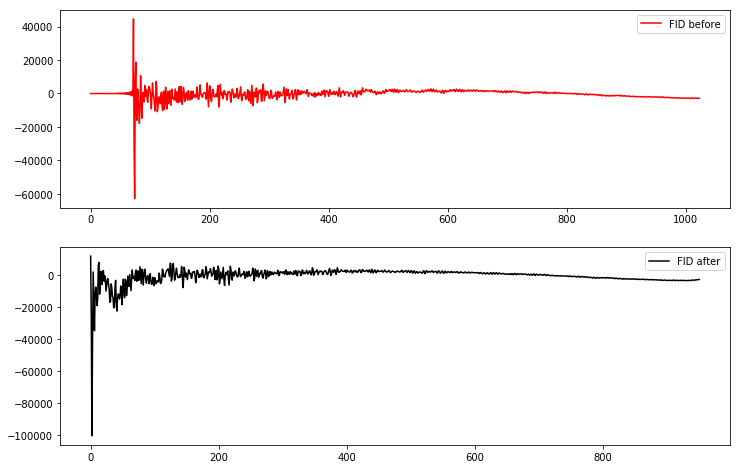

In [235]:
plt.figure(figsize=(12,8))                   # make a figure. Size it 12 x 8. 
plt.subplot(2, 1, 1)                         # create subplot (2x1) and this is the first (1)
plt.plot(np.real(fid),                       # plot the real part of fid before. 
         c='r',                              # Colour it red ('r')
         label='FID before'                  # Label is 'FID Before'
        )  
plt.legend()                                 # plot the legend (the label)

plt.subplot(2, 1, 2)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.real(fid_adjusted),              # plot the real part of fid after adjustment. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='FID after'                   # Label is 'FID after'
        )
plt.legend()                                 # plot the legend (the label)

plt.show()                                   # show it!

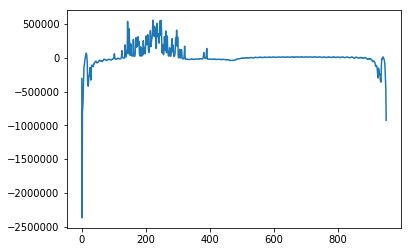

In [236]:
plt.plot(np.fft.fft(fid_adjusted)); plt.show()

In [90]:
import numpy as np               # conventient handling of numbers, lists, arrays
import matplotlib.pyplot as plt  # plotting functions
import maunakini as mk           # NMR data handling objects. Mauna Kini means 'many mountains' in Hawaiian. 
import nmrplotlib as npl         # custom NMR data plotting functions
import os

In [117]:
HNCO = mk.LINData3D('3D_HNCO_linear')  # load data from directory '3D_NNOESY_long_linear'
HNCO.points = [300, 72, 128]

Data Points structure is: [2048, 72, 128]
DECIM= 1392 DSPFVS= 20 GRPDLY= 67.9874420166016
Echo-AntiEcho Detected in T2 - dealing with it...
Converted Data Points structure is: [955, 72, 128]


In [118]:
%time HNCO.proc(phases=(5, 90, 0), t3_ss=None, fp_corrections=(.5, .5, .5), windows=('sb', 'sb', 'sb'), windows_p=(0.35, 0.5, 0.35), zero_fill=(1, 1, 1))
data_no_ss = HNCO.processed_data

(1024, 128, 128)
Processing t3
Processing t2
Processing t1
CPU times: user 9.3 s, sys: 104 ms, total: 9.41 s
Wall time: 9.42 s


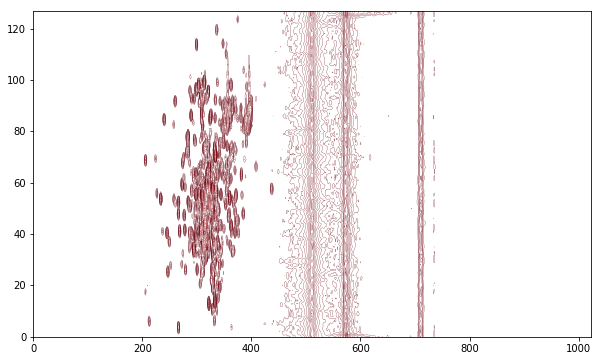

In [119]:
npl.plot_2d_spectrum(np.amax(data_no_ss[:,:,3:124], axis=2).T, noise=1500000, levels=20, space=1.4, sign='PosNeg', save='HNCO_plane_sup_butter_low.pdf')


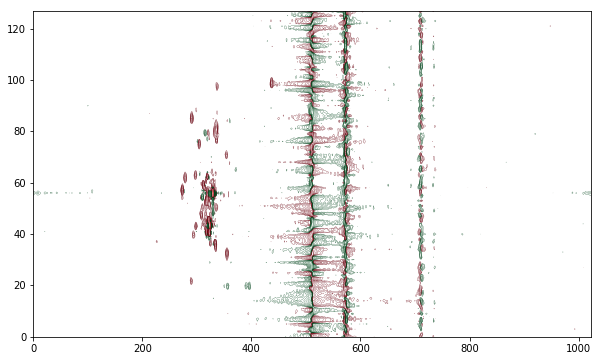

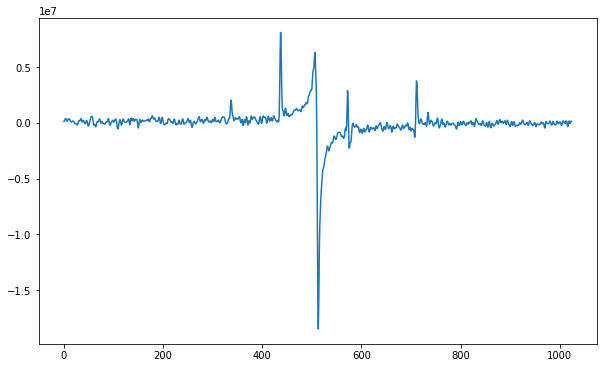

In [120]:
npl.plot_2d_spectrum(data_no_ss[:, 58, :].T, noise=750000, levels=20, space=1.4, sign='PosNeg', save='HNCO_plane_sup_butter_low.pdf')
plane = data_no_ss[:, 58, :].T
fig = plt.figure(figsize=(10, 6))
plt.plot(plane[98,:]); plt.show()

In [121]:
%time HNCO.proc(phases=(5, 90, 0), t3_ss='poly', fp_corrections=(.5, .5, .5), windows=('sb', 'sb', 'sb'), windows_p=(0.35, 0.5, 0.35), zero_fill=(1, 1, 1))
data_poly_ss = HNCO.processed_data

(1024, 128, 128)
Processing t3
Processing t2
Processing t1
CPU times: user 35.8 s, sys: 196 ms, total: 36 s
Wall time: 14.9 s


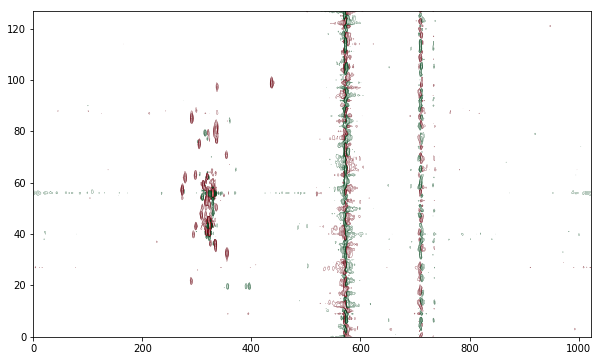

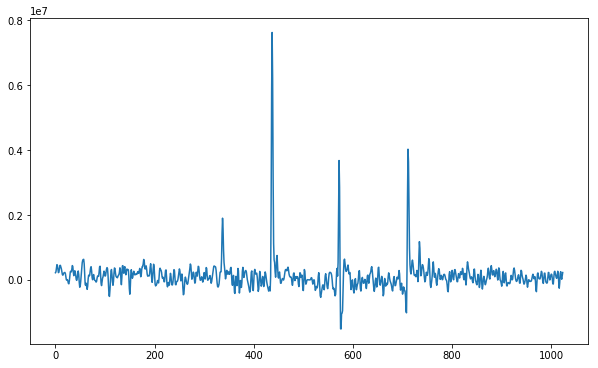

In [122]:
npl.plot_2d_spectrum(data_poly_ss[:, 58, :].T, noise=750000, levels=20, space=1.4, sign='PosNeg', save='HNCO_plane_sup_butter_low.pdf')
plane = data_poly_ss[:, 58, :].T
fig = plt.figure(figsize=(10, 6))
plt.plot(plane[98,:]); plt.show()

In [123]:
%time HNCO.proc(phases=(5, 90, 0), t3_ss='butter', fp_corrections=(.5, .5, .5), windows=('sb', 'sb', 'sb'), windows_p=(0.35, 0.5, 0.35), zero_fill=(1, 1, 1))
data_butter_ss = HNCO.processed_data

(1024, 128, 128)
Processing t3
Processing t2
Processing t1
CPU times: user 15.6 s, sys: 141 ms, total: 15.7 s
Wall time: 15.8 s


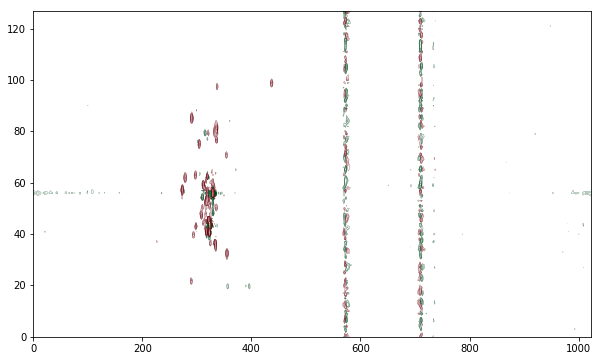

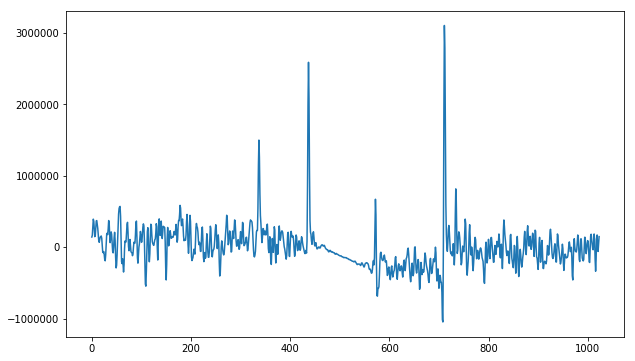

In [124]:
npl.plot_2d_spectrum(data_butter_ss[:, 58, :].T, noise=750000, levels=20, space=1.4, sign='PosNeg', save='HNCO_plane_sup_butter_low.pdf')
plane = data_butter_ss[:, 58, :].T
fig = plt.figure(figsize=(10, 6))
plt.plot(plane[98,:]); plt.show()

In [125]:
import numpy as np               # conventient handling of numbers, lists, arrays
import matplotlib.pyplot as plt  # plotting functions
import maunakini as mk           # NMR data handling objects. Mauna Kini means 'many mountains' in Hawaiian. 
import nmrplotlib as npl         # custom NMR data plotting functions
import os

In [81]:
NOESY = mk.LINData3D('3D_NNOESY_long_linear')  # load data from directory '3D_NNOESY_long_linear'

Data Points structure is: [2048, 68, 1200]
DECIM= 16 DSPFVS= 12 GRPDLY= 71.625
Echo-AntiEcho Detected in T2 - dealing with it...
Converted Data Points structure is: [951, 68, 1200]


In [82]:
NOESY.points = [951, 64, 512]

In [83]:
%time NOESY.proc(phases=(-85, 0, 0), t3_ss=None, fp_corrections=(.5, .5, .5), windows=('sb', 'sb', 'sb'), windows_p=(0.35, 0.5, 0.35), zero_fill=(1, 1, 1))

(2048, 64, 512)
Processing t3
Processing t2
Processing t1
CPU times: user 49.9 s, sys: 372 ms, total: 50.3 s
Wall time: 50.4 s


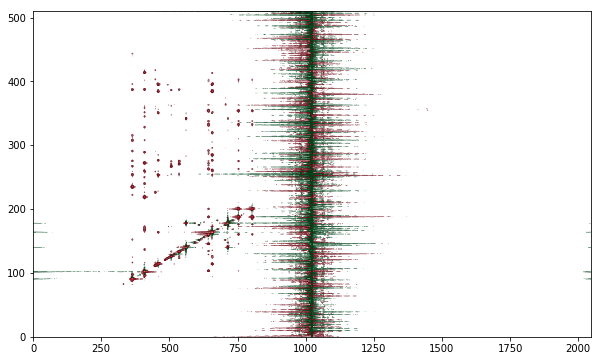

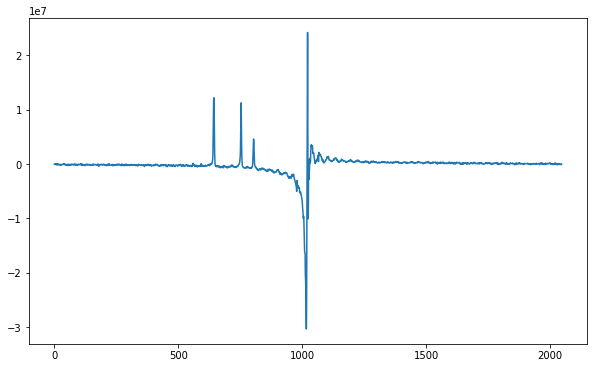

In [85]:
data_none_ss = NOESY.processed_data
npl.plot_2d_spectrum(data_none_ss[:, 39, :].T, noise=1000000, levels=20, space=1.4, sign='PosNeg', save='HNCO_plane_sup_butter_low.pdf')
plane = data_none_ss[:, 39, :].T
fig = plt.figure(figsize=(10, 6))
plt.plot(plane[333,:]); plt.show()

In [86]:
%time NOESY.proc(phases=(-85, 0, 0), t3_ss='poly', fp_corrections=(.5, .5, .5), windows=('sb', 'sb', 'sb'), windows_p=(0.35, 0.5, 0.35), zero_fill=(1, 1, 1))

(2048, 64, 512)
Processing t3
Processing t2
Processing t1
CPU times: user 2min 9s, sys: 554 ms, total: 2min 9s
Wall time: 1min 6s


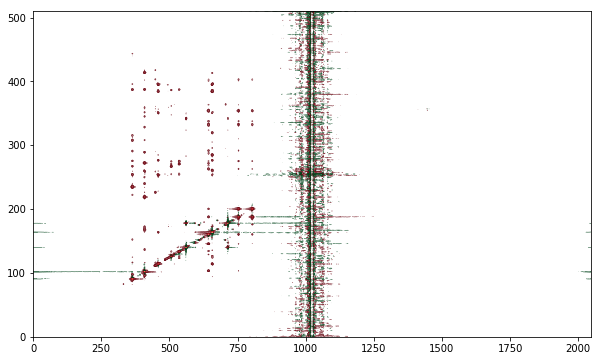

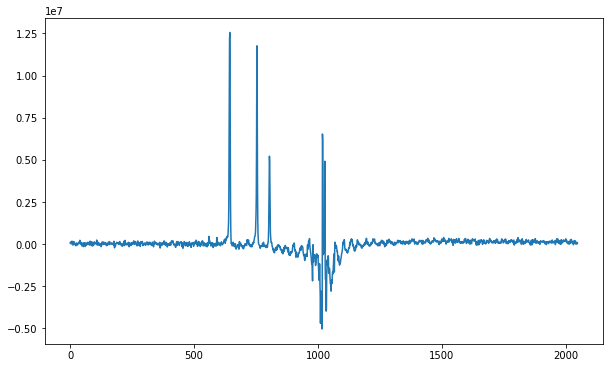

In [87]:
data_poly_ss = NOESY.processed_data
npl.plot_2d_spectrum(data_poly_ss[:, 39, :].T, noise=1000000, levels=20, space=1.4, sign='PosNeg', save='HNCO_plane_sup_butter_low.pdf')
plane = data_poly_ss[:, 39, :].T
fig = plt.figure(figsize=(10, 6))
plt.plot(plane[333,:]); plt.show()

In [88]:
%time NOESY.proc(phases=(-85, 0, 0), t3_ss='butter', fp_corrections=(.5, .5, .5), windows=('sb', 'sb', 'sb'), windows_p=(0.35, 0.5, 0.35), zero_fill=(1, 1, 1))

(2048, 64, 512)
Processing t3
Processing t2
Processing t1
CPU times: user 1min 4s, sys: 410 ms, total: 1min 4s
Wall time: 1min 4s


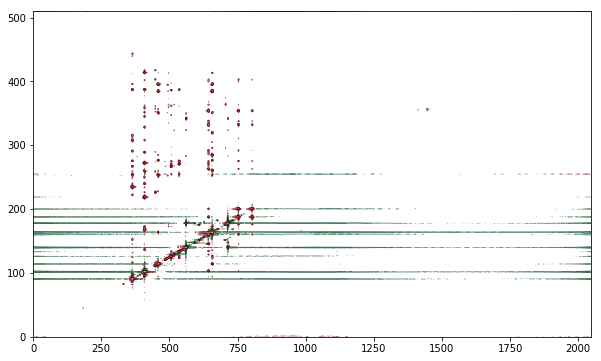

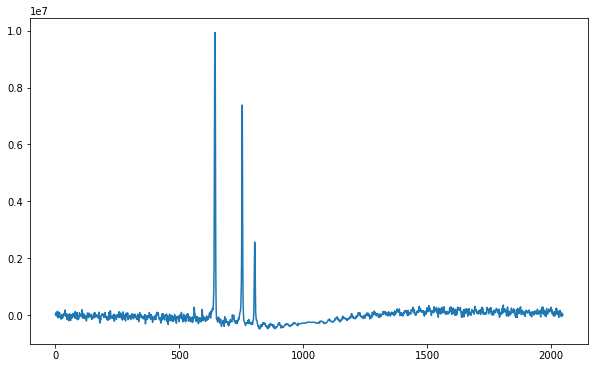

In [89]:
data_butter_ss = NOESY.processed_data
npl.plot_2d_spectrum(data_butter_ss[:, 39, :].T, noise=500000, levels=20, space=1.4, sign='PosNeg', save='HNCO_plane_sup_butter_low.pdf')
plane = data_butter_ss[:, 39, :].T
fig = plt.figure(figsize=(10, 6))
plt.plot(plane[333,:]); plt.show()

In [ ]:
npl.plot_2d_spectrum(np.amax(data_butter_ss[:, 10:53, :], axis=1).T, noise=500000, levels=20, space=1.4, sign='PosNeg', save='HNCO_plane_sup_butter_low.pdf')


In [126]:
pwd

'/Users/scott/Desktop/Work/NUS_Sampling'